# Circle & Torus

In [1]:
using Pkg
Pkg.activate("../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`
Precompiling project...
  ✓ Plots → FileIOExt
  1 dependency successfully precompiled in 3 seconds. 244 already precompiled.


In [2]:
include("../src/analogous_bars.jl")
include("../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var


WebIO._IJuliaInit()

In [3]:
using DelimitedFiles
using Plots
using CSV
using Distances
using HDF5

# 1. Load data 

In [4]:
# directory
directory = "data/torus_circle/"

# load points. Coordinates are on a square torus
P = h5read(directory * "coords.h5", "circle")
Q = h5read(directory * "coords.h5", "torus")

# print number of points 
print("number of points in P: ", size(P,1), "\n")
print("number of points in Q: ", size(Q,1))

# load distance matrices
D_P = readdlm(directory * "distance_circle.csv")
D_Q = readdlm(directory * "distance_torus.csv")
D_P_Q = readdlm(directory * "distance_circle_torus.csv")
D_Q_P = readdlm(directory * "distance_torus_circle.csv");
     

number of points in P: 20
number of points in Q: 300

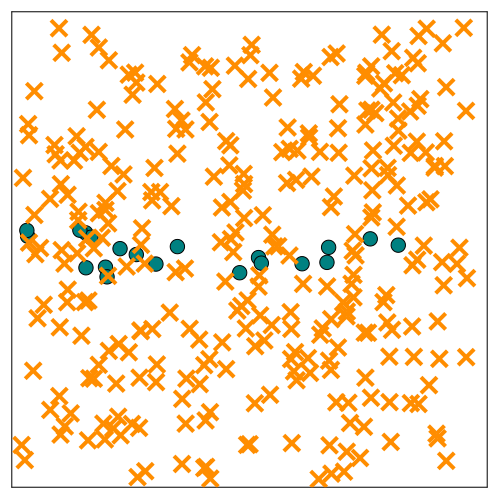

In [5]:
# plot P
p = plot(framestyle = :box, yaxis = nothing, xaxis = nothing,
        size = (500, 500), xlim = (-0.1, 6.5), ylim = (-0.1, 6.5))

scatter!(p,P[:,1], P[:,2], color = "#008181", 
            label = "", 
            markersize = 8, 
            marker = :circle)

# plot Q
scatter!(p, Q[:,1], Q[:,2], color = "#ff8d00", 
            label = "", 
            markersize = 8, 
            marker = :xcross,
            markerstrokewidth = 4
            )
#savefig("data/torus_circle/points.pdf")
plot(p)

In [6]:
# Compute Vietoris-Rips persistence on two regions
dim = 1
VR_P = eirene(D_P, record = "all", maxdim = dim)
VR_Q = eirene(D_Q, record = "all", maxdim = dim)

# compute Witness persistence
W_P = compute_Witness_persistence(D_P_Q, maxdim = dim);

In [9]:
# plot all PD
barcode_VR_P = barcode(VR_P, dim = 1)
barcode_W_P = barcode(W_P["eirene_output"], dim = 1)
barcode_VR_Q = barcode(VR_Q, dim = 1);

In [10]:
selected_Q, cutoff_Q = select_persistent_intervals_IQR(barcode_VR_Q)

([84, 85], 0.8371533880128125)

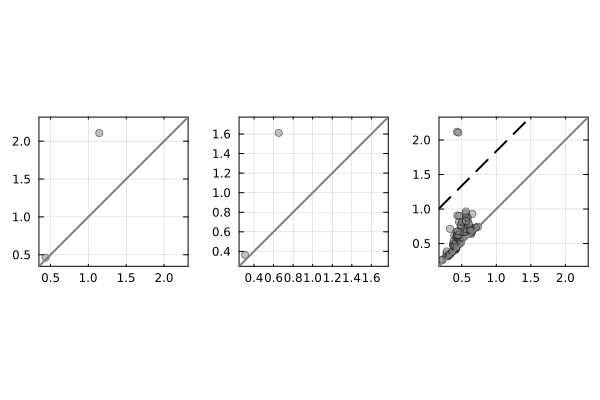

In [11]:
# plot all PD
p1 = plot_PD(barcode_VR_P)
p2 = plot_PD(barcode_W_P)
p3 = plot_PD(barcode_VR_Q, cutoff = cutoff_Q)
plot(p1, p2, p3, layout = grid(1,3))

# Run analogous cycles

In [ ]:
analogous_P, analogous_Q, _ = run_baseline_similarity_analogous(;
                                                                VR_P = VR_P,
                                                                D_P = D_P, 
                                                                VR_Q = VR_Q,
                                                                D_Q = D_Q, 
                                                                W_PQ = W_P, 
                                                                W_PQ_bars = [1,2]);

In [52]:
significant_P = [i for i in 1:size(barcode_VR_P,1)]
significant_Q = selected_Q

analogous_P1 = [i for i in analogous_P[1]["baseline_bar_extension"] if i in significant_P]
analogous_Q1 = [i for i in analogous_Q[1]["baseline_bar_extension"] if i in significant_Q]
println("Analogous pair: ", analogous_P1, analogous_Q1)

Analogous pair: [2][84]


In [55]:
analogous_Q[2]["baseline_bar_extension"]

So there is one analogous pair, given by (2, 84)

In [79]:
# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = [2],
            title = "PD(P)", 
            titlefontsize = 16,
            tickfontsize = 12,
            markersize = 9)

p2 = plot_PD(barcode_VR_Q; 
            highlight = [84],
            title = "PD(Q)", 
            cutoff = cutoff_Q,
            markersize = 9,
            tickfontsize = 12,
            titlefontsize = 16)

plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/torus_circle/analogous_cycles.pdf")

"/home/hyoon/analogous_neural/examples/data/torus_circle/analogous_cycles.pdf"

In [9]:
cr_P = get_cyclerep_Eirene(VR_P, 2)
cr_Q = get_cyclerep_Eirene(VR_Q, 84)

p1 = plot_cycle_single_square_torus(P, cycle = cr_P, title = ""; 
                                    legend = false,
                                    cycle_color = :deeppink,
                                    markersize = 5,
                                    c = "#008181",
                                    xlim = (-0.1, 6.5), ylim = (-0.1, 6.5))
p2 = plot_cycle_single_square_torus(Q, cycle = cr_Q, title = ""; 
                                    markersize = 6, 
                                    marker = :xcross,
                                    cycle_color = :deeppink,
                                    markerstrokewidth = 4,
                                    c = "#ff8d00",
                                    xlim = (-0.1, 6.5), ylim = (-0.1, 6.5),
                                    legend = false)

plot(p1, p2, layout = grid(1,2), size = (600, 300))
#savefig("data/torus_circle/analogous_cycle_rep.pdf")

"/home/hyoon/analogous_neural/examples/data/torus_circle/analogous_cycle_rep.pdf"

# Variations of analogous cycles

Run similarity-centric analogous bars at birthtime of witness cycle

In [11]:
@time extension_P, extension_Q = run_similarity_analogous_birthtime(
                                            VR_P = VR_P,
                                            D_P = D_P,
                                            VR_Q = VR_Q,
                                            D_Q = D_Q,
                                            W_PQ = W_P,
                                            W_PQ_bar = 1
                                            );

105.031279 seconds (1.06 G allocations: 104.939 GiB, 9.24% gc time, 6.68% compilation time)


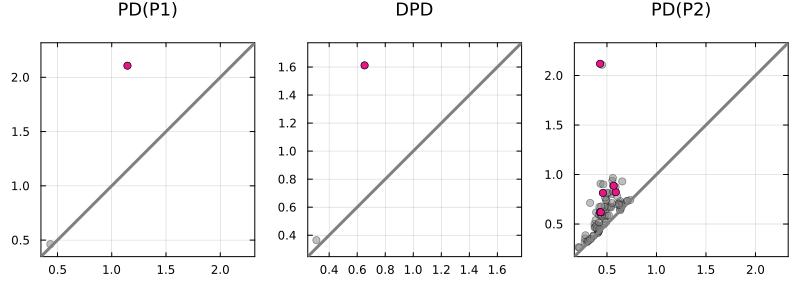

In [12]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 1

# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = extension_P["Ybar_rep_tau"],
            title = "PD(P1)", 
            titlefontsize = 12)

p2 = plot_PD(barcode_W_P; 
            highlight = [witness_idx],
            title = "DPD", 
            titlefontsize = 12)

p3 = plot_PD(barcode_VR_Q; 
            highlight = extension_Q["Ybar_rep_tau"],
            title = "PD(P2)", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))

In [20]:
extension_P["Ybar_rep_tau"]

1-element Vector{Int64}:
 2

In [34]:
print(extension_Q["Ybar_rep_tau"])

# find the bars that are "significant"
println([i for i in extension_Q["Ybar_rep_tau"] if i in selected_Q])

[56, 75, 64, 84, 70, 38][84]


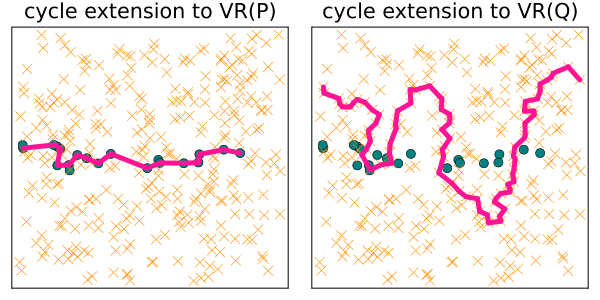

In [9]:
cr_P = get_cyclerep_Eirene(VR_P, 2)
cr_Q = get_cyclerep_Eirene(VR_Q, 84)

p1 = plot_cycle_square_torus(P, Q, cycle = cr_P, cycle_loc = "P", title = "cycle extension to VR(P)"; legend = false)
p2 = plot_cycle_square_torus(P, Q, cycle = cr_Q, cycle_loc = "Q", title = "cycle extension to VR(Q)"; legend = false)

plot(p1, p2, layout = grid(1,2), size = (600, 300))

Using the faster version

In [13]:
@time extension_P2, extension_Q2 = run_similarity_analogous_birthtime_fast(
                                            VR_P = VR_P,
                                            D_P = D_P,
                                            VR_Q = VR_Q,
                                            D_Q = D_Q,
                                            W_PQ = W_P,
                                            W_PQ_bar = 1
                                            );

extension to VR_P complete
Dowker complete
Dict{Any, Any}(2 => 1, 1 => 2) 75.756359 seconds (938.64 M allocations: 94.842 GiB, 7.75% gc time, 0.66% compilation time)


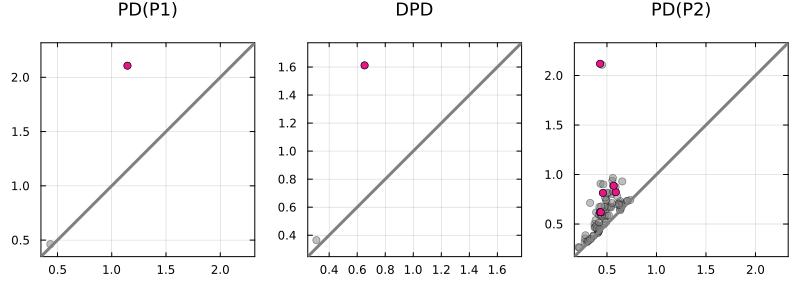

In [14]:
# plot similarity-centric analogous pairs 
# select Witness bar
witness_idx = 1

# plot all persistence diagrams & significance feature cutoff
p1 = plot_PD(barcode_VR_P; 
            highlight = extension_P2["Ybar_rep_tau"],
            title = "PD(P1)", 
            titlefontsize = 12)

p2 = plot_PD(barcode_W_P; 
            highlight = [witness_idx],
            title = "DPD", 
            titlefontsize = 12)

p3 = plot_PD(barcode_VR_Q; 
            highlight = extension_Q2["Ybar_rep_tau"],
            title = "PD(P2)", 
            titlefontsize = 12)

plot(p1, p2, p3, layout = grid(1,3), size = (800, 300))